<a href="https://colab.research.google.com/github/paulagm12/DSPS_PGalvezMolina/blob/main/HW4_5PGalvezMolina/InClass_Lab_Oct16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [3]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


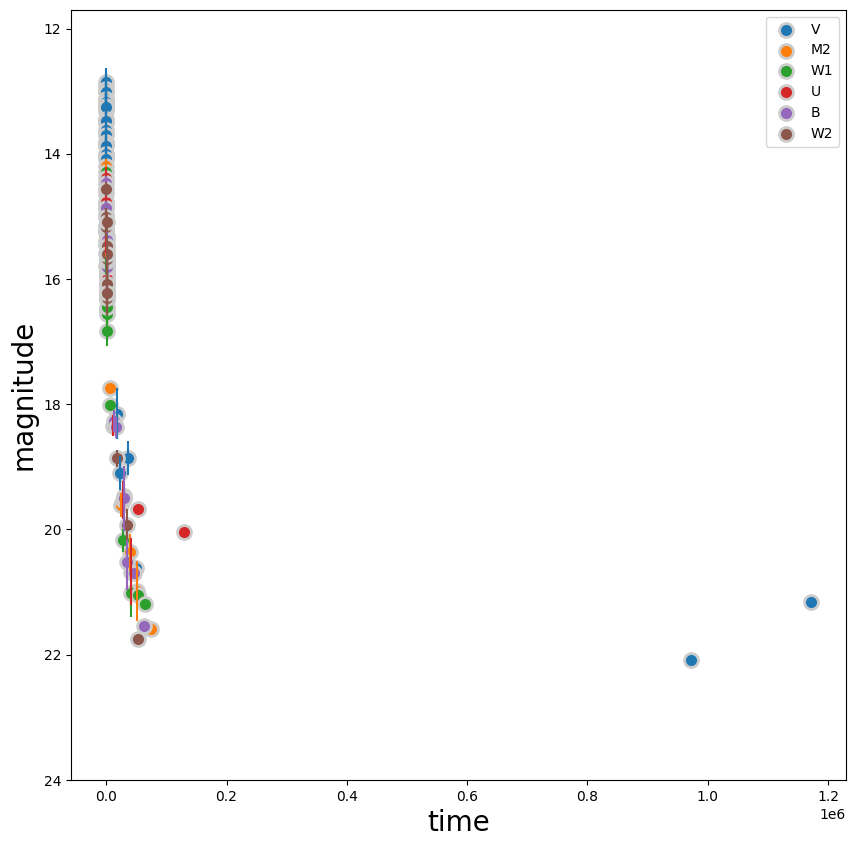

In [4]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("time", fontsize=20);

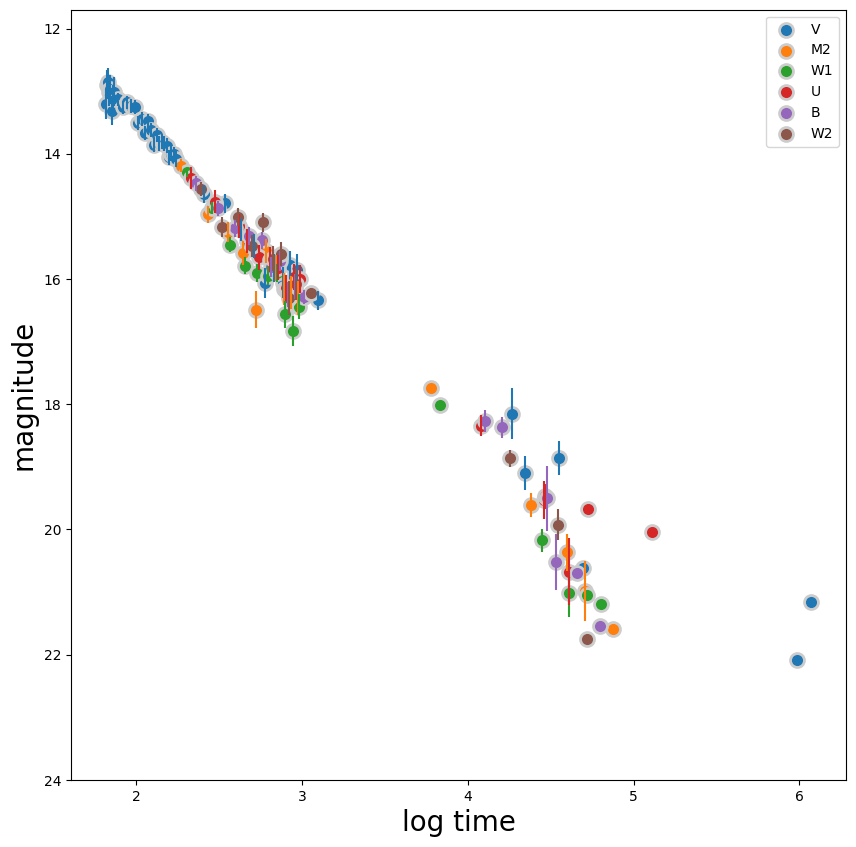

In [5]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)

#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(np.log10(grbAG.loc[grbAG["filter"] == f, "time"]),
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()

#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [6]:
grbAG = grbAG[grbAG.upperlimit == 0]
grbAG

,filter,time,mag,magerr,upperlimit
0,V,66,13.210000,0.24,0
1,V,67,12.900000,0.23,0
2,V,68,12.860000,0.23,0
3,V,69,13.010000,0.23,0
4,V,70,12.970000,0.23,0
...,...,...,...,...,...
103,V,35638,18.860000,0.27,0
104,M2,39683,20.369034,0.30,0
105,W1,40585,21.017147,0.39,0
106,U,41040,20.674538,0.54,0


In [13]:
x = np.log10(grbAG["time"].values)
X = np.c_[np.ones(len(x)), x]
y = grbAG["mag"].values

theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([8.58266823, 2.51199984])

In [10]:
print("The best fit parameters from the Normal Equation are intercept: {0:3.2f} slope {1:3.2f}.".format(*theta_best))

The best fit parameters from the Normal Equation are intercept: 8.58 slope 2.51.


In [15]:
# Fitting linear regression from Scikitlearn
lr = LinearRegression()
lr.fit(X,y)
slope = lr.coef_[1]
intercept = lr.intercept_
print("The best fit parameters from the Scikitlearn are intercept: {0:.2f} slope {1:.2f}.".format(slope, intercept))

The best fit parameters from the Scikitlearn are intercept: 2.51 slope 8.58.


In [16]:
from scipy.optimize import minimize

def line(x, m, b):
  f_x = []
  for i in range(len(x)):
    f_x.append(m*x[i] + b)
  return f_x

def of(x, y, f_x):
  L_1 = 0
  for i in range(x):
    L_1 += abs(f_x - y)
  return

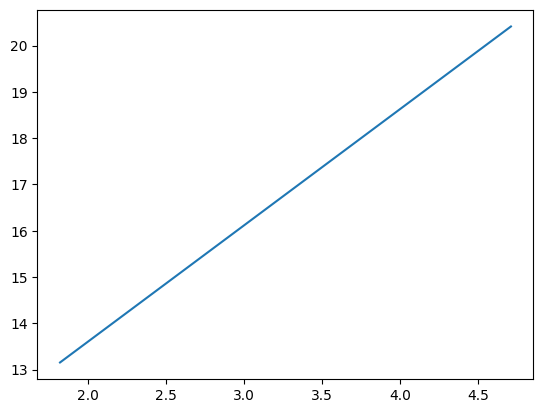

In [17]:
y_1 = line(x, slope, intercept)
pl.plot(x, y_1)

In [18]:
# Dr. Bianco's solutions
def line_fed(intercept, slope, x):
  return slope*x + intercept

def of_fed(args, x, y):
  intercept, slope = args
  return sum(np.abs(y-line_fed(intercept, slope, x)))

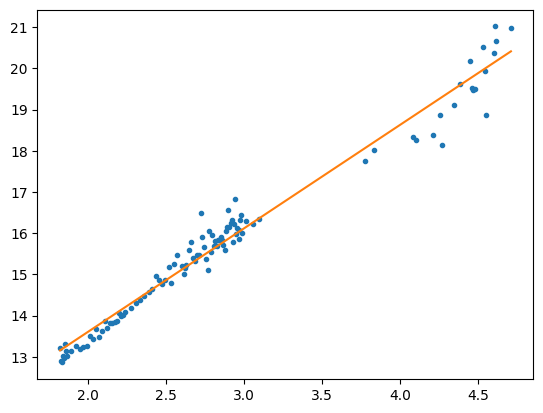

In [19]:
pl.plot(x, y, '.')
pl.plot(x, line_fed(intercept, slope, x))
pl.show()

In [20]:
initialGuess = [10,1]
l1Solution = minimize(of_fed, initialGuess, args=(x,y))
print(l1Solution)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 26.303314072819276
        x: [ 8.225e+00  2.641e+00]
      nit: 20
      jac: [ 0.000e+00 -7.153e-07]
 hess_inv: [[ 2.576e-07 -1.766e-08]
            [-1.766e-08  5.461e-09]]
     nfev: 180
     njev: 60


In [25]:
x_train, x_test, y_train, y_test  = train_test_split(
     x, y, test_size=0.25, random_state=42)

In [35]:
initialGuess = (10, 1)

l1_split = minimize(of_fed, initialGuess,
	args=(x_train, y_train))

print("best fit parameters from the minimization of the L1: " +
       "slope {:.2f}, intercept {:.2f}".format(*l1_split.x))

print("R square on training set: ", Rsquare(l1_split.x, x_train, y_train))
print("R square on test set: ", Rsquare(l1_split.x, x_test, y_test))

best fit parameters from the minimization of the L1: slope 8.40, intercept 2.57


NameError: ignored